In [5]:
import sys
sys.path.append('/Users/fannylemus/Documents/Diplomado/Modulo1/practica3')

In [9]:
import zipfile
import pandas as pd
import json

# Ruta al archivo zip
zip_path = '/Users/fannylemus/Documents/Diplomado/Modulo1/practica3/data/starbucks.zip'

# Crear un diccionario para almacenar los DataFrames
dataframes = {}

# Usar zipfile para abrir el archivo zip
with zipfile.ZipFile(zip_path, 'r') as z:
    # Iterar sobre cada archivo en el zip y imprimir los nombres de los archivos
    print("Archivos en el zip:")
    for filename in z.namelist():
        print(filename)  # Imprimir cada nombre de archivo encontrado
        # Asegurarse de que es un archivo json
        if filename.endswith('.json'):
            # Leer el archivo json dentro del zip
            with z.open(filename) as f:
                # Leer todo el contenido del archivo como un string
                content = f.read().decode('utf-8')
                # Dividir el contenido en múltiples objetos JSON por línea nueva
                json_objects = content.splitlines()
                # Convertir cada objeto JSON en un diccionario y almacenarlos en una lista
                data_list = [json.loads(obj) for obj in json_objects if obj.strip()]
                # Convertir la lista de diccionarios a DataFrame
                df = pd.DataFrame(data_list)
                dataframes[filename] = df





Archivos en el zip:
starbucks/
starbucks/portfolio.json
starbucks/profile.json
starbucks/transcript.json


In [10]:
# Se leen los df que nos interesan del zip
df_profile = dataframes['starbucks/profile.json']
df_portfolio = dataframes['starbucks/portfolio.json']
df_transcript = dataframes['starbucks/transcript.json']

In [11]:
df_portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4.0,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [12]:
df_profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


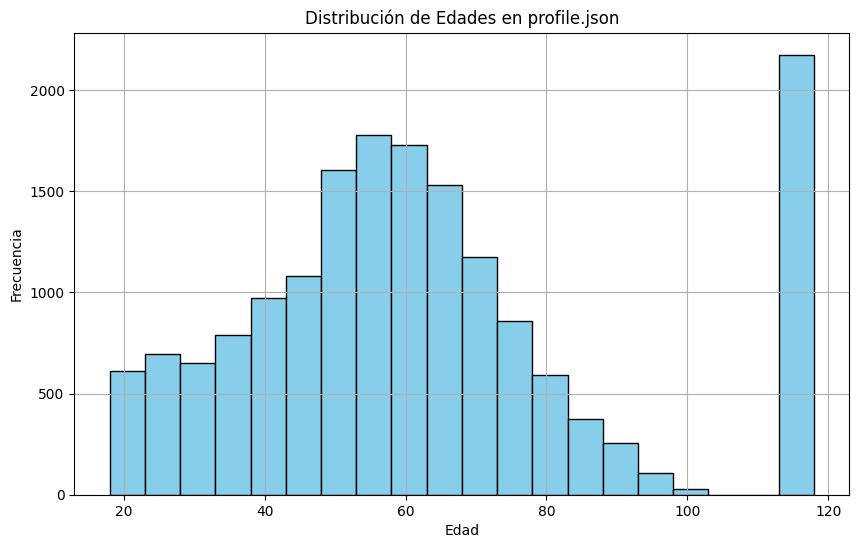

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_profile['age'], bins=20, color='skyblue', edgecolor='black') 
plt.title('Distribución de Edades en profile.json')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


1. Moda Aparente
La distribución tiene una moda clara alrededor de los 60 años, indicando que este es el grupo de edad más frecuente en el conjunto de datos.

2. Distribución Bimodal
La gráfica muestra una distribución bimodal donde hay dos picos prominentes, uno alrededor de los 60 años y otro notable pico en los 118 años.
3. Anomalía en 118 Años
El pico en 118 años es probablemente una anomalía o un valor utilizado para representar datos faltantes o inexactos. En muchos conjuntos de datos, las edades extremadamente altas como 118 podrían ser códigos para situaciones donde la verdadera edad no fue proporcionada o conocida.

4. Distribución Principal
Aparte de la anomalía, la mayoría de las edades se concentra entre los 40 y 70 años, lo que indica una población adulta y de mediana edad en su mayoría.
 5. Implicaciones para Servicios y Productos
La prevalencia de un grupo de edad más maduro podría influir en el tipo de productos, servicios y comunicaciones que se deben diseñar para este grupo demográfico. Por ejemplo, en el caso de Starbucks, esto podría influir en las ofertas de productos o en la estrategia de marketing para atraer a este grupo de edad predominante.

6. Potencial de Limpieza de Datos
Dado el pico inusual a los 118 años, sería prudente revisar estos datos para confirmar si deberían ser tratados como valores atípicos o códigos para otros significados, lo que podría requerir una limpieza o ajuste antes de realizar análisis más detallados.


In [14]:

df_profile['became_member_on'] = pd.to_datetime(df_profile['became_member_on'], format='%Y%m%d')
df_profile['became_member_on'].head()

0   2017-02-12
1   2017-07-15
2   2018-07-12
3   2017-05-09
4   2017-08-04
Name: became_member_on, dtype: datetime64[ns]

#### 4.- MISSINGS

In [15]:

# Rellenar valores nulos en la columna 'gender' con 'Missing'
df_profile['gender'] = df_profile['gender'].fillna('Missing')


In [16]:
# Ver las primeras filas para asegurar que los nulos están reemplazados por 'Missing'
print(df_profile['gender'].head())


0    Missing
1          F
2    Missing
3          F
4    Missing
Name: gender, dtype: object


In [17]:
# Encontrar la moda de la columna 'gender' que no sea 'Missing'
mode_value = df_profile[df_profile['gender'] != 'Missing']['gender'].mode()[0]

# Crear una nueva columna con valores imputados basados en la moda
df_profile['gender_imputed'] = df_profile['gender'].replace('Missing', mode_value)


In [18]:
# Ver las primeras filas de la columna original y la columna imputada para comparar
print(df_profile[['gender', 'gender_imputed']].head())


    gender gender_imputed
0  Missing              M
1        F              F
2  Missing              M
3        F              F
4  Missing              M


#### 5.- FILTRADO DE EDADES

In [19]:

# Filtrar el DataFrame para retener solo las filas donde la edad es menor o igual a 100
df_profile_filtered = df_profile[df_profile['age'] <= 100]


In [20]:
# Ver las primeras filas del DataFrame filtrado
print(df_profile_filtered.head())

# Otra opción es ver estadísticas descriptivas de la columna 'age'
print(df_profile_filtered['age'].describe())


   gender  age                                id became_member_on    income  \
1       F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15  112000.0   
3       F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09  100000.0   
5       M   68  e2127556f4f64592b11af22de27a7932       2018-04-26   70000.0   
8       M   65  389bc3fa690240e798340f5a15918d5c       2018-02-09   53000.0   
12      M   58  2eeac8d8feae4a8cad5a6af0499a211d       2017-11-11   51000.0   

   gender_imputed  
1               F  
3               F  
5               M  
8               M  
12              M  
count    14820.000000
mean        54.377800
std         17.365541
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        100.000000
Name: age, dtype: float64


In [21]:
# Analizar la distribución de género en el grupo de edad <= 100
print(df_profile_filtered['gender'].value_counts())


M    8484
F    6124
O     212
Name: gender, dtype: int64


#### 6.- SUBCONJUNTO DE TRANSACCIONES

In [22]:
# Crear un subconjunto con solo las transacciones
transactions = df_transcript[df_transcript['event'] == 'transaction']

In [23]:
# Extraer el valor 'amount' de la columna 'value'
transactions['amount'] = transactions['value'].apply(lambda x: x['amount'])


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_71006/3855271181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['amount'] = transactions['value'].apply(lambda x: x['amount'])


In [24]:
# Mostrar las primeras filas del DataFrame 'transactions' para asegurar que la columna 'amount' se ha añadido correctamente
print(transactions.head())


                                 person        event              value  time  \
12654  02c083884c7d45b39cc68e1314fec56c  transaction   {'amount': 0.83}     0   
12657  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  transaction  {'amount': 34.56}     0   
12659  54890f68699049c2a04d415abc25e717  transaction  {'amount': 13.23}     0   
12670  b2f1cd155b864803ad8334cdf13c4bd2  transaction  {'amount': 19.51}     0   
12671  fe97aa22dd3e48c8b143116a8403dd52  transaction  {'amount': 18.97}     0   

       amount  
12654    0.83  
12657   34.56  
12659   13.23  
12670   19.51  
12671   18.97  


In [25]:
# Suma total de 'amount'
total_amount = transactions['amount'].sum()
print("Total Amount of Transactions:", total_amount)

# Promedio de transacciones
average_amount = transactions['amount'].mean()
print("Average Transaction Amount:", average_amount)


Total Amount of Transactions: 1775451.9699999997
Average Transaction Amount: 12.777356156398204


### AGRUPACION Y ANALISIS DE TRANSACCIONES

#### AGRUPACIÓN POR PERSONAS

In [26]:

# Agrupar por la columna 'person' y calcular las estadísticas deseadas para 'amount' y 'time'
grouped = transactions.groupby('person').agg({
    'amount': ['min', 'max', 'mean'],  # mínimo, máximo y promedio para 'amount'
    'time': ['count', 'sum', 'mean']   # conteo, suma y promedio para 'time'
})

# Renombrar las columnas
grouped.columns = [
    'amount_min', 'amount_max', 'amount_mean',
    'time_count', 'time_sum', 'time_mean'
]

# Convertir el MultiIndex en columnas simples
grouped.reset_index(inplace=True)

# Renombrar el DataFrame para reutilizar el nombre 'transactions'
transactions = grouped

# Mostrar las primeras filas del nuevo DataFrame 'transactions'
print(transactions.head())


                             person  amount_min  amount_max  amount_mean  \
0  0009655768c64bdeb2e877511632db8f        8.57       28.16    15.950000   
1  00116118485d4dfda04fdbaba9a87b5c        0.20        3.19     1.363333   
2  0011e0d4e6b944f998e987f904e8c1e5        8.96       23.03    15.892000   
3  0020c2b971eb4e9188eac86d93036a77       17.24       33.86    24.607500   
4  0020ccbbb6d84e358d3414a3ff76cffd        6.81       20.08    12.837500   

   time_count  time_sum  time_mean  
0           8      4344     543.00  
1           3      1224     408.00  
2           5      2256     451.20  
3           8      2790     348.75  
4          12      4500     375.00  


In [27]:
# Verificar el DataFrame resultante
print(transactions.describe())  # Obtener descripciones estadísticas

# Mostrar información específica para entender el DataFrame
print(transactions.info())


         amount_min    amount_max   amount_mean    time_count      time_sum  \
count  16578.000000  16578.000000  16578.000000  16578.000000  16578.000000   
mean       7.201121     31.030820     13.680266      8.381771   3198.352515   
std        7.132637     81.283816     16.056763      5.009822   1955.978490   
min        0.050000      0.050000      0.050000      1.000000     12.000000   
25%        0.650000      7.330000      3.181392      5.000000   1710.000000   
50%        5.250000     19.165000     11.996607      7.000000   2778.000000   
75%       12.520000     29.680000     20.469643     11.000000   4296.000000   
max       50.080000   1062.280000    451.470000     36.000000  15036.000000   

          time_mean  
count  16578.000000  
mean     390.049317  
std       89.951153  
min       12.000000  
25%      331.391403  
50%      386.500000  
75%      443.684211  
max      714.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16578 entries, 0 to 16577
Data columns (

#### CRUCE DE DATAFRAMES

In [28]:
# Crear un subconjunto de profile con las columnas necesarias
profile_subset = df_profile[['id', 'age', 'income']]


In [29]:
# Renombrar la columna 'id' a 'person' para hacer el join
profile_subset.rename(columns={'id': 'person'}, inplace=True)


/var/folders/7s/6dg646794vzfr0p_f36fxvjm0000gn/T/ipykernel_71006/361206408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_subset.rename(columns={'id': 'person'}, inplace=True)


In [30]:
# Realizar un join tipo 'inner'
X = pd.merge(transactions, profile_subset, on='person', how='inner')


In [33]:
X.head()

,amount_min,amount_max,amount_mean,time_count,time_sum,time_mean,age,income
person,,,,,,,,
0009655768c64bdeb2e877511632db8f,8.57,28.16,15.950000,8,4344,543.00,33,72000.0
00116118485d4dfda04fdbaba9a87b5c,0.20,3.19,1.363333,3,1224,408.00,118,NaN
0011e0d4e6b944f998e987f904e8c1e5,8.96,23.03,15.892000,5,2256,451.20,40,57000.0
0020c2b971eb4e9188eac86d93036a77,17.24,33.86,24.607500,8,2790,348.75,59,90000.0
0020ccbbb6d84e358d3414a3ff76cffd,6.81,20.08,12.837500,12,4500,375.00,24,60000.0


In [35]:
X.to_csv('/Users/fannylemus/Documents/Diplomado/Modulo1/practica3/data/X_dataframe.csv', index=False)

### DETECCIÓN DE OUTLIERS

#### DETECCIÓN DE OUTLIERS

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


In [42]:
def detect_outliers(data, method='IQR'):
    """
    Detecta outliers en una serie de datos usando el método especificado: 'IQR', 'Z-score', o 'MAD'.
    
    Parámetros:
    - data (pd.Series): Serie de datos en la cual buscar outliers.
    - method (str): Método para usar en la detección de outliers. Opciones: 'IQR', 'Z-score', 'MAD'.
    
    Retorna:
    - np.array: Índices de los outliers.
    """
    if method == 'IQR':
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return data.index[(data < lower_bound) | (data > upper_bound)].tolist()
    
    elif method == 'Z-score':
        z_scores = zscore(data)
        return data.index[np.abs(z_scores) > 3].tolist()
    
    elif method == 'MAD':
        median = data.median()
        mad = np.median(np.abs(data - median))
        mad_based_threshold = 2.5 * mad
        return data.index[(np.abs(data - median) > mad_based_threshold)].tolist()

    else:
        raise ValueError("Método no soportado. Utilice 'IQR', 'Z-score' o 'MAD'.")


#### APLICACIÓN DE DETECCIÓN DE OUTLIERS

In [43]:

# Aplicar la detección de outliers para la columna 'age' en el DataFrame X
outliers_iqr = detect_outliers(X['age'], method='IQR')
outliers_z_score = detect_outliers(X['age'], method='Z-score')
outliers_mad = detect_outliers(X['age'], method='MAD')

# Mostrar los resultados
print("Outliers detectados usando IQR:", outliers_iqr)
print("Outliers detectados usando Z-score:", outliers_z_score)
print("Outliers detectados usando MAD:", outliers_mad)


Outliers detectados usando IQR: ['00116118485d4dfda04fdbaba9a87b5c', '0063def0f9c14bc4805322a488839b32', '0069a50874d846438e58acff5e594725', '0092a132ead946ceb30d11a1ed513d20', '009d10c2c38a4fd795a7bc6ddbbddb78', '00ad4c2cace94f67a6354ec90d6c6f45', '00b5fb9d842d437e83033ad9e36f7148', '0100dbd4e8554aa69b73b6ac0547f6bf', '0106d19a26af41288035afc4b9b6c2c2', '012ee55a90bd4d969b0d0cdfaffdf6ab', '0155a21497d54684a55c3bc609843768', '0193c118afe84208b33ffeb1dcb277d8', '01e91c5bc14148b2a4de0ce819e4c500', '020354b1aea342cbaa018993f68fba68', '020c2d7b3d1b4d24b9502626b2d7ef46', '020d3a52b9ce432ea5f98fc58e9bfcc4', '0223ed57fef54575ac0b256937dc68fa', '027561a162a54d86b6d45af5071c4d27', '0295719cd357460cbab54f2392b01d19', '02a00d256444415da8460cd2a3457ea7', '02b148f44eee4b9ca7487371472a6781', '02d206df55d54efda515783e1c525e8d', '02d2c404f19440ff9038c0d60a695cbd', '02f446e152254ab7b01e29698932dd01', '02f77bb76ed14d28a05e23b3e00aeb9b', '032aaa79b15e4103a9e91a786d416734', '03361f5f681e46ad97796d52caf9af